In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
def tanh(x): return (1.0 - np.exp(-2*x)) / (1.0 + np.exp(-2*x))
def tanh_derivative(x):
    return (1 + tanh(x)) * (1 - tanh(x))

In [25]:
class NeuralNetwork:
    def __init__(self, net_arch):
        self.activation_func = tanh
        self.activation_derivative = tanh_derivative
        self.layers = len(net_arch)
        self.steps_per_epoch = 1000
        self.net_arch = net_arch
        
        self.weights = []
        for layer in range(len(net_arch) - 1):
            w = 2 * np.random.rand(net_arch[layer] + 1, net_arch[layer + 1]) - 1 # revisar el + 1 del primer parámetro
            self.weights.append(w)
    def fit(self, data, labels, learning_rate=0.1, epochs=10):
        """
            :param data: data is the set of all possible pairs of
            booleans
            True or False indicated by the integers 1 or 0
            labels is the result of the logical operation
            'xor'
            on each of those input pairs
            :param labels: array of 0/1 for each datum
        """
        # add bias units to the input layer
        ones = np.ones((1, data.shape[0]))
        Z = np.concatenate((ones.T, data), axis=1)
        training = epochs * self.steps_per_epoch
        for k in range(training):
            #if k % self.steps_per_epoch == 0:
                # print ('epochs:', k/self.steps_per_epoch)
                # print('epochs: {}',format(k / self.steps_per_epoch))
                # for s in data:
                    # print(s, self.predict(s))
                      
            sample = np.random.randint(data.shape[0])
            y = [Z[sample]]

            for i in range(len(self.weights) - 1): 
                activation = np.dot(y[i], self.weights[i])
                activation_f = self.activation_func(activation)
                # add the bias for the next layer
                activation_f = np.concatenate((np.ones(1), np.array(activation_f)))
                y.append(activation_f)

            # last layer
            activation   = np.dot(y[-1],self.weights[-1])
            activation_f = self.activation_func(activation)
            y.append(activation_f)

            # error for the output layer
            error = labels[sample] - y[-1]
            delta_vec = [error * self.activation_derivative(y[-1])]

            # we need to begin from the back from the next to last layer
            for i in range(self.layers - 2, 0, -1):
                error = delta_vec[-1].dot(self.weights[i][1:].T)
                error = error * self.activation_derivative(y[i][1:])
                delta_vec.append(error)

            # reverse
            # level3(output)→level2(hidden)] ⇒ [level2(hidden)→level3(output)]
            delta_vec.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation
            # to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight
            for i in range(len(self.weights)):
                layer = y[i].reshape(1, self.net_arch[i] + 1)

                delta = delta_vec[i].reshape(1, self.net_arch[i + 1])
                self.weights[i] += learning_rate * layer.T.dot(delta)
                      
    def predict(self, x):
        val = np.concatenate((np.ones(1).T, np.array(x)))
        for i in range(0, len(self.weights)):
            val = self.activation_func(np.dot(val, self.weights[i]))
            val = np.concatenate((np.ones(1).T, np.array(val)))

        return val[1]

    def plot_decision_regions(self, X, y, points=200):
        markers = ('o', '^')
        colors  = ('red', 'blue')
        cmap    = ListedColormap(colors)

        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        # To produce zoomed-out figures, you can replace the preceding 2 lines with:
        # x1_min, x1_max = -10, 11
        # x2_min, x2_max = -10, 11

        resolution = max(x1_max - x1_min, x2_max - x2_min) / float(points)

        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))

        input = np.array([xx1.ravel(), xx2.ravel()]).T
        Z = np.empty(0)
        for i in range(input.shape[0]):
            val = self.predict(np.array(input[i]))
            if val < 0.5:
                val = 0
            if val >= 0.5:
                val = 1
            Z = np.append(Z, val)

        Z = Z.reshape(xx1.shape)

        plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # plot all samples

        classes = ["False", "True"]

        for idx, cl in enumerate(np.unique(y)):
          plt.scatter(x=X[y == cl, 0],
                      y=X[y == cl, 1],
                      alpha = 1.0,
                      c = colors[idx],
                      edgecolors='black',
                      marker=markers[idx],
                      s=80,
                      label=classes[idx]
                     )

        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.legend(loc='upper left')
        plt.show()

Final prediction
[0 0] 0.0012727225711137685
[0 1] 0.9959722238309799
[1 0] 0.9956395059768969
[1 1] -0.0009980517998701905


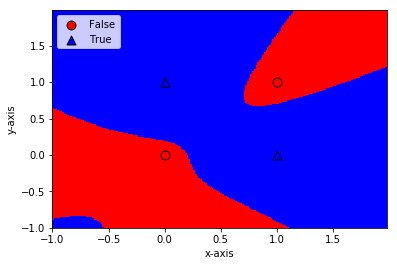

In [27]:
if __name__ == '__main__':
    np.random.seed(0)
    
    networks = [
        [2,4,1]
    ]
    
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])

    y = np.array([0,1,1,0])

    
    for net_arch in networks:
        # Initialize the neural network with 2 input, 2 hidden, and 1 output neurons
        nn = NeuralNetwork(net_arch)

        nn.fit(X, y, epochs=10)
        print("Final prediction")
        for s in X:
            print(s, nn.predict(s))

        nn.plot_decision_regions(X, y)        